In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

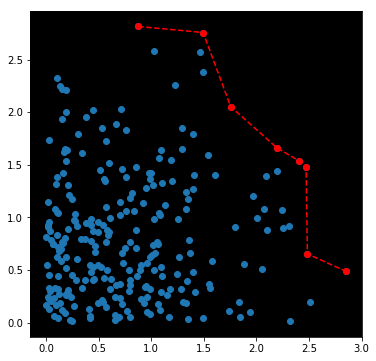

In [23]:
df = pd.DataFrame({
    'x': np.random.normal(size=1000),
    'y': np.random.normal(size=1000)
}).query('x > 0 and y > 0').drop_duplicates() # Assumption of No duplication 

selected_indexes = []
for i, row in df.iterrows():
    x, y = row['x'], row['y']
    if len(df.drop(i).query("x>=@x and y>=@y")) == 0:
        selected_indexes.append(i)
df_frontiers = df.loc[selected_indexes].sort_values(columns)

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df.x, df.y)
ax.plot(df_frontiers.x, df_frontiers.y, color='red', marker='o', ls='--')
ax.set_facecolor('black')
ax.set_aspect('equal')
plt.show()

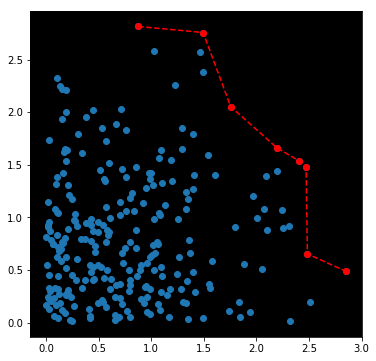

In [24]:
columns = list(df.columns)
selected_indexes = []

for i, row in df.iterrows():
    df_temp = df.drop(i)
    condition = pd.Series(True, index = df_temp.index)
    for col in columns:
        condition &= (df_temp[col] >= row[col])
    if len(df_temp[condition]) == 0:
        selected_indexes.append(i)
        
df_frontiers = df.loc[selected_indexes].sort_values(columns)

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df.x, df.y)
ax.plot(df_frontiers.x, df_frontiers.y, color='red', marker='o', ls='--')
ax.set_facecolor('black')
ax.set_aspect('equal')
plt.show()